In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [5]:
data.dropna(inplace=True)

In [6]:
def clean_review(Review):
  str = ' '.join(word for word in Review.split() if word.lower() not in stopwords.words('english'))
  return str

In [7]:
import numpy as np

In [8]:
vectorized_clean_review = np.vectorize(clean_review)
data['review'] = vectorized_clean_review(data['review'])

In [9]:
from wordcloud import WordCloud

In [10]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))

In [11]:
# Create the WordCloud object with proper parameters
wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(reviews)

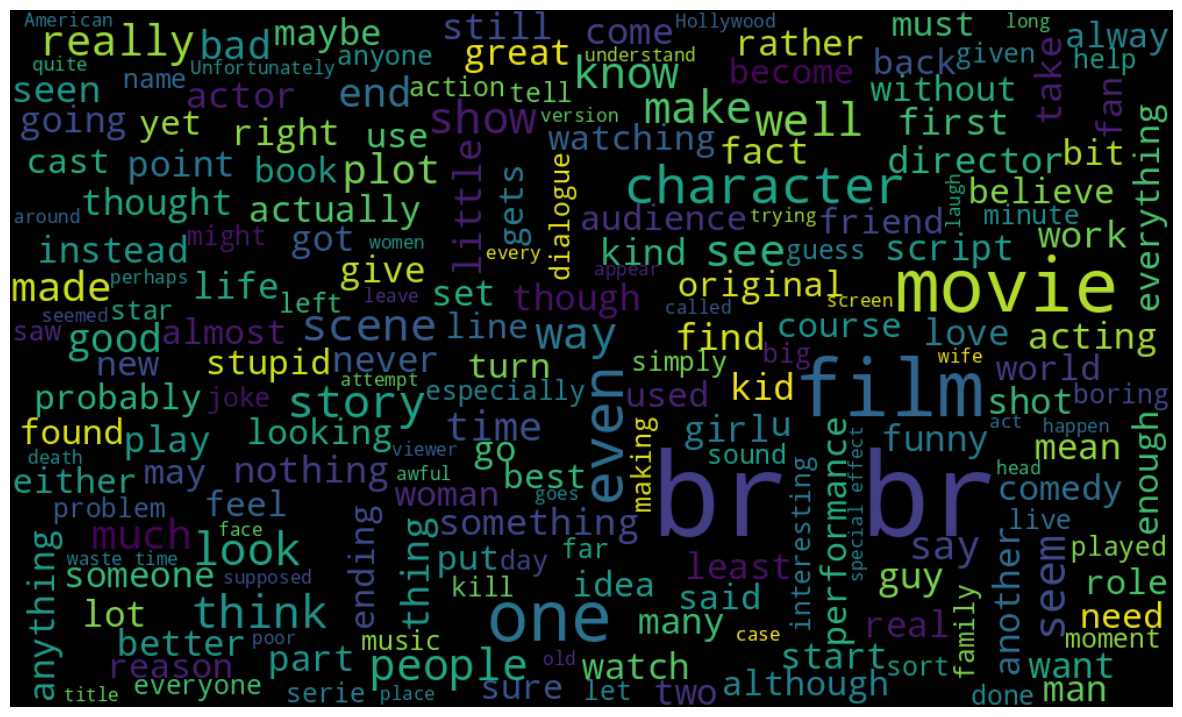

In [12]:
# Plot the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))

In [14]:
# Create the WordCloud object with proper parameters
wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(reviews)

(np.float64(-0.5), np.float64(999.5), np.float64(599.5), np.float64(-0.5))

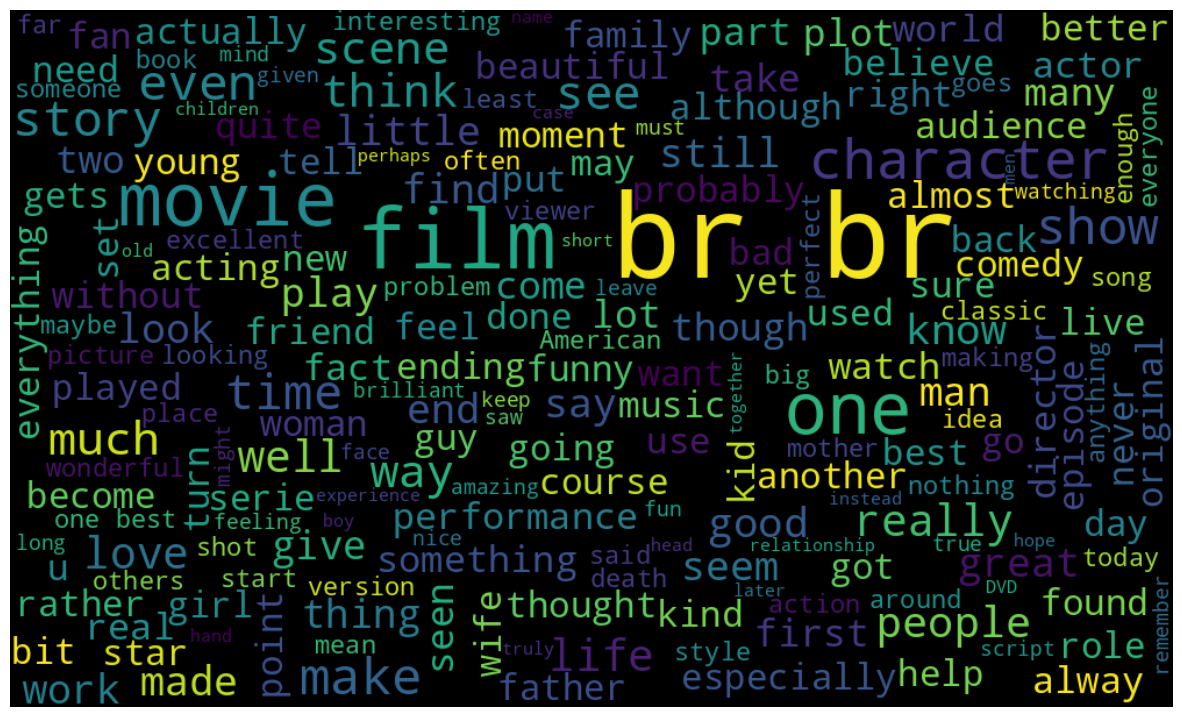

In [15]:
# Plot the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [58]:
# we are using logistic regression
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

cv = TfidfVectorizer(max_features=2500)
reviews = cv.fit_transform(data['review'])  # ✅ THIS FITS THE VECTORIZER
# reviews = cv.fit_transform(data['review']).toarray()  # This fits it!

In [61]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

In [62]:
data['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [64]:
from sklearn.model_selection import train_test_split

In [73]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(
    reviews, data['sentiment'], test_size=0.2, random_state=42
)

In [74]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [75]:
predict = model.predict(reviews_test)

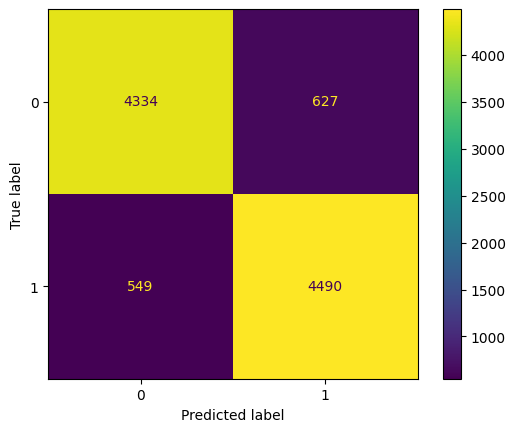

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [77]:
# # Then train your model
# model.fit(X, data['label'])

# ✅ Now it's safe to save
pickle.dump((cv, model), open('model.pkl', 'wb'))
